# TITANIC EDA

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
#I'll call my dataframe df
df = pd.read_csv('titanic.csv')

In [3]:
print('The shape of this dataset is:', df.shape)
df.head(2)

The shape of this dataset is: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
print('Do i have any null value in this dataset?')
df.isnull().sum()

Do i have any null value in this dataset?


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#I'm not going to considerer the "Cabin"
df = df.drop('Cabin', axis=1)

,Sex
male,577
female,314


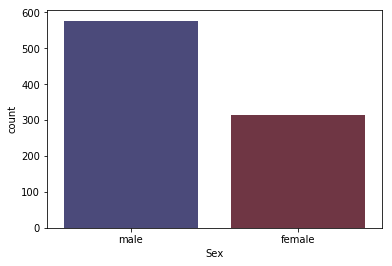

In [6]:
sns.countplot(x='Sex', data=df,palette='icefire')
p = pd.DataFrame(df.Sex.value_counts())
p

In [7]:
p['%']= p['Sex']/p['Sex'].sum()*100
p

,Sex,%
male,577,64.758698
female,314,35.241302


In the dataset we found 891 records of which 577 are from male people and 314 are female records.
We see then that 65% of the records are male and the remaining 35% are female.

Pclass          %
Sex    Pclass                   
female 3          144  16.161616
       1           94  10.549944
       2           76   8.529742
male   3          347  38.945006
       1          122  13.692480
       2          108  12.121212

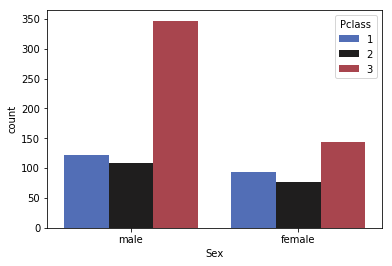

In [8]:
pclass = pd.DataFrame(df.groupby(df.Sex)['Pclass'].value_counts())
pclass['%']= pclass['Pclass']/pclass['Pclass'].sum()*100
sns.countplot(x='Sex', hue='Pclass', data=df, palette='icefire')
pclass

If we relate between both sexes and the 3 classes, we will have 6 groups where we can see that where the largest number of records is in the group of men in the 3rd class that represent 38.9% of the total records.

On the other hand, the group that concentrates the least amount of records are women who were in the 2nd class.

## Completing missing values - Age

This dataset contains missing values in the "age" field (177 records). I will complete them using the criteria of the average of age by class, sex and sal.

In [9]:
#need to improve this function
def fillMissingAge(colms):
#     print(colms)
    age = colms[0]
    pclass = colms[1]
    sex = colms[2]
    sal = colms[3]
    if pd.isnull(age):
        if pclass == 1 and sex == 'male' and sal == 'Mr':
            return 40
        elif pclass == 1 and sex == 'female' and sal == 'Mrs':
            return 33
        if pclass == 2 and sex == 'male' and sal == 'Mr':
            return 32
        elif pclass == 2 and sex == 'female' and sal == 'Mrs':
            return 32
        elif pclass == 3 and sex == 'male' and sal == 'Mr':
            return 25
        elif pclass == 3 and sex == 'female' and sal == 'Mrs':
            return 25
        
        elif pclass == 1 and sex == 'female' and sal == 'Miss':
            return 30
        if pclass == 2 and sex == 'male' and sal == 'Master':
            return 5
        elif pclass == 2 and sex == 'female' and sal == 'Miss':
            return 25
        elif pclass == 3 and sex == 'male' and sal == 'Master':
            return 5
        elif pclass == 3 and sex == 'female' and sal == 'Miss':
            return 18
        elif pclass == 1 and sex == 'male':
            return 40
    else:
        return age

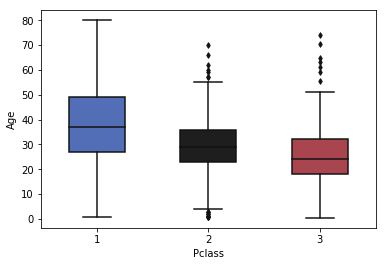

In [10]:
sns.boxplot( x=df["Pclass"], y=df["Age"], palette='icefire',width=0.5,fliersize=4)

We can see that on average, the 1st class has a higher average age than the rest of the classes.

But we must not lose sight that both in class 2 and in 3, there are records whose age reaches (and in some records exceeds) 60 years.

## Survive (or not?)

Now what I'm going to do is analyze according to gender, age and class, the percentages of the surviving records.

Survived          %
Sex    Survived                     
female 1              233  26.150393
       0               81   9.090909
male   0              468  52.525253
       1              109  12.233446

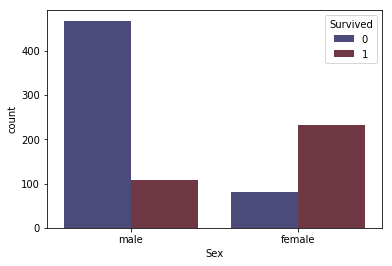

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='icefire')
p1 = pd.DataFrame(df.groupby(df.Sex)['Survived'].value_counts())
p1['%'] = (p1['Survived']/p1['Survived'].sum()*100)
p1

Records indicate that more than 78% of records did not survive (mostly men - 52% of men traveling).

On the other hand it is seen that the records of surviving women double the records of women who did not survive.

Survived          %
Pclass Survived                     
1      1              136  15.263749
       0               80   8.978676
2      0               97  10.886644
       1               87   9.764310
3      0              372  41.750842
       1              119  13.355780

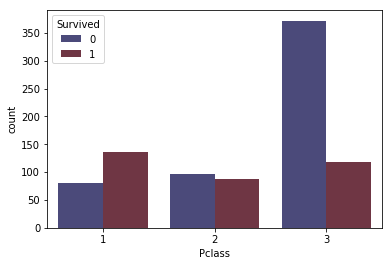

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='icefire')
p2 = pd.DataFrame(df.groupby(df.Pclass)['Survived'].value_counts())
p2['%'] = (p2['Survived']/p2['Survived'].sum()*100)
p2

In [13]:
df['sex_dummie'] = pd.get_dummies(df['Sex'],drop_first=True)

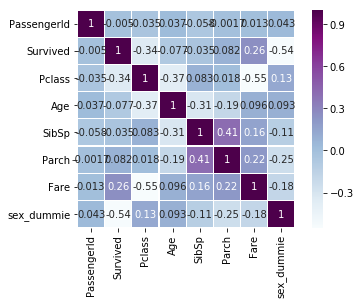

In [14]:
df.corr()
colormap = plt.cm.BuPu
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)